# MSCS 634  
Lab 1 – Data Preparation and Exploration

## NOTE: Sreenshots are labelled on the screenshot required labels

## Step 1: Data Collection
We use the Iris dataset, a well-known dataset that includes data on 150 iris flowers across three species.

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Screenshot Required**: Output of `df.head()` showing first five rows.

## Step 2: Data Visualization

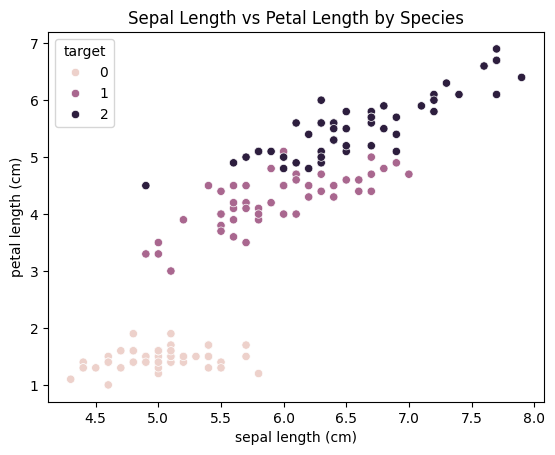

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='target')
plt.title("Sepal Length vs Petal Length by Species")
plt.show()

**Screenshot Required**: Scatter plot of Sepal Length vs Petal Length.

**Insight**: Clear distinction among species, especially in petal length.

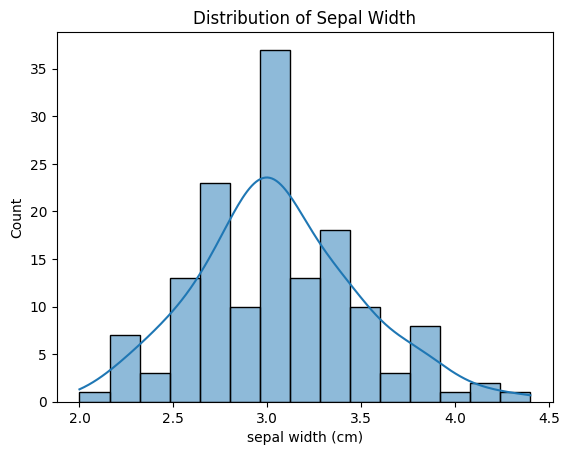

In [5]:
sns.histplot(df['sepal width (cm)'], bins=15, kde=True)
plt.title("Distribution of Sepal Width")
plt.show()

**Screenshot Required**: Histogram of Sepal Width.

**Insight**: Sepal width appears normally distributed with slight skew.

## Step 3: Data Preprocessing

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Screenshot Required**: Output of missing values check.

In [7]:
Q1 = df['sepal length (cm)'].quantile(0.25)
Q3 = df['sepal length (cm)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['sepal length (cm)'] < (Q1 - 1.5 * IQR)) | (df['sepal length (cm)'] > (Q3 + 1.5 * IQR))]
outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


**Screenshot Required**: IQR values and identified outliers.

In [8]:
df = df.drop(outliers.index)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Screenshot Required**: Dataset after removing outliers.

In [9]:
df_reduced = df.drop(columns=['sepal width (cm)'])
df_reduced.head()

,sepal length (cm),petal length (cm),petal width (cm),target
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


**Screenshot Required**: Dataset after dropping 'sepal width (cm)'.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['petal length scaled'] = scaler.fit_transform(df[['petal length (cm)']])
df[['petal length (cm)', 'petal length scaled']].head()

,petal length (cm),petal length scaled
0,1.4,0.067797
1,1.4,0.067797
2,1.3,0.050847
3,1.5,0.084746
4,1.4,0.067797


**Screenshot Required**: Dataset before and after scaling 'petal length (cm)'.

## Step 4: Statistical Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal length (cm)    150 non-null    float64
 1   sepal width (cm)     150 non-null    float64
 2   petal length (cm)    150 non-null    float64
 3   petal width (cm)     150 non-null    float64
 4   target               150 non-null    int64  
 5   petal length scaled  150 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,petal length scaled
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,0.467458
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.299203
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.101695
50%,5.800000,3.000000,4.350000,1.300000,1.000000,0.567797
75%,6.400000,3.300000,5.100000,1.800000,2.000000,0.694915
max,7.900000,4.400000,6.900000,2.500000,2.000000,1.000000


**Screenshot Required**: Output of `.info()` and `.describe()`.

In [13]:
df['sepal length (cm)'].min(), df['sepal length (cm)'].max(), df['sepal length (cm)'].mean(), df['sepal length (cm)'].median(), df['sepal length (cm)'].mode()[0]

(np.float64(4.3),
 np.float64(7.9),
 np.float64(5.843333333333334),
 np.float64(5.8),
 np.float64(5.0))

**Screenshot Required**: Minimum, Maximum, Mean, Median, and Mode for 'sepal length (cm)'.

In [14]:
range_val = df['sepal length (cm)'].max() - df['sepal length (cm)'].min()
Q1 = df['sepal length (cm)'].quantile(0.25)
Q3 = df['sepal length (cm)'].quantile(0.75)
IQR = Q3 - Q1
variance = df['sepal length (cm)'].var()
std_dev = df['sepal length (cm)'].std()
(range_val, Q1, Q3, IQR, variance, std_dev)

(np.float64(3.6000000000000005),
 np.float64(5.1),
 np.float64(6.4),
 np.float64(1.3000000000000007),
 np.float64(0.6856935123042507),
 np.float64(0.828066127977863))

**Screenshot Required**: Range, Quartiles, IQR, Variance, and Standard Deviation.

In [15]:
df.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,petal length scaled
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561,0.871754
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658,-0.428440
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035,1.000000
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547,0.962865
target,0.782561,-0.426658,0.949035,0.956547,1.000000,0.949035
petal length scaled,0.871754,-0.428440,1.000000,0.962865,0.949035,1.000000


**Screenshot Required**: Correlation matrix output.